In [2]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris()
x, y = iris.data, iris.target

classifier = KNeighborsClassifier()

In [3]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
#test & train data separation by accident
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.5, random_state=123)
# test_size = 0.5 means 50% test data and 50% train data
# random_state=123 for having same accidental data

print('Labels for training and testing data')
print(train_y)
print(test_y)

Labels for training and testing data
[1 1 0 2 2 0 0 1 1 2 0 0 1 0 1 2 0 2 0 0 1 0 0 1 2 1 1 1 0 0 1 2 0 0 1 1 1
 2 1 1 1 2 0 0 1 2 2 2 2 0 1 0 1 1 0 1 2 1 2 2 0 1 0 2 2 1 1 2 2 1 0 1 1 2
 2]
[1 2 2 1 0 2 1 0 0 1 2 0 1 2 2 2 0 0 1 0 0 2 0 2 0 0 0 2 2 0 2 2 0 0 1 1 2
 0 0 1 1 0 2 2 2 2 2 1 0 0 2 0 0 1 1 1 1 2 1 2 0 2 1 0 0 2 1 2 2 0 1 1 2 0
 2]


In [6]:
# proportion calculation:different proportion of labels(iris types) in training and testing data
# we cannot find a good results with different proportion from real data proportions 
import numpy as np
print('All:', np.bincount(y) / float(len(y)) * 100.0)
print('Training:', np.bincount(train_y) / float(len(train_y)) * 100.0)
print('Test:', np.bincount(test_y) / float(len(test_y)) * 100.0)

All: [33.33333333 33.33333333 33.33333333]
Training: [30.66666667 40.         29.33333333]
Test: [36.         26.66666667 37.33333333]


In [7]:
train_x, test_x, train_y, test_y = train_test_split(x, y, 
                                                    test_size=0.5, 
                                                    random_state=123, 
                                                    stratify=y)

print('All:', np.bincount(y) / float(len(y)) * 100.0)
print('Training:', np.bincount(train_y) / float(len(train_y)) * 100.0)
print('Test:', np.bincount(test_y) / float(len(test_y)) * 100.0)



All: [33.33333333 33.33333333 33.33333333]
Training: [33.33333333 33.33333333 33.33333333]
Test: [33.33333333 33.33333333 33.33333333]


In [8]:
# Accuracy calculation by test (not_used) data
classifier.fit(train_x, train_y)
pred_y = classifier.predict(test_x)

print('Fraction correct [Accuracy]:')
print(np.sum(pred_y == test_y) / float(len(test_y)))

Fraction correct [Accuracy]:
0.96


In [10]:
print('\nsamples correctly classified:')
correct_idx = np.where(pred_y == test_y)[0]
print(correct_idx)

print('\nsamples incorrectly classified:')
incorrect_idx = np.where(pred_y != test_y)[0]
print(incorrect_idx)


samples correctly classified:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 45 46 47 48
 50 51 52 53 54 55 56 57 58 59 61 62 63 64 65 66 67 68 69 70 71 72 73 74]

samples incorrectly classified:
[44 49 60]


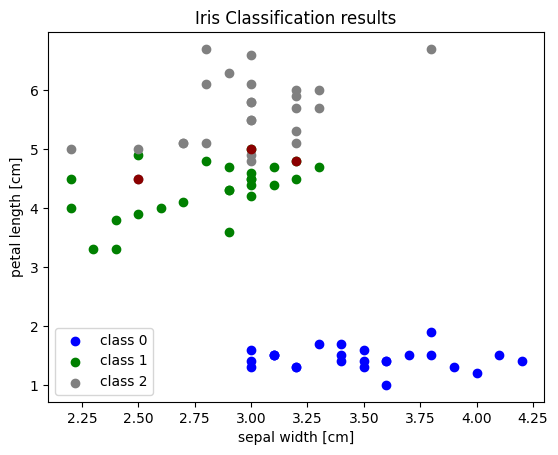

In [12]:
# plot two dimensions
import matplotlib.pyplot as plt
colors = ['blue', 'green', 'gray']

for n, color in enumerate(colors):
    idx = np.where(test_y == n)[0]
    plt.scatter(test_x[idx, 1], test_x[idx, 2], color=color,
    label='class %s' % str(n))
plt.scatter(test_x[incorrect_idx, 1], test_x[incorrect_idx, 2], color ='darkred')
plt.xlabel('sepal width [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc=3)
plt.title('Iris Classification results')
plt.Figure(figsize=(10, 10))
plt.show()

In [13]:
enumerate?

Init signature: enumerate(iterable, start=0)
Docstring:     
Return an enumerate object.

  iterable
    an object supporting iteration

The enumerate object yields pairs containing a count (from start, which
defaults to zero) and a value yielded by the iterable argument.

enumerate is useful for obtaining an indexed list:
    (0, seq[0]), (1, seq[1]), (2, seq[2]), ...
Type:           type
Subclasses:     